In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#preprocessing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# data import
df = pd.read_csv('/content/Churn_Modelling.csv')
print(f'The data has {df.shape[0]} rows and {df.shape[1]} columns')


The data has 10000 rows and 14 columns


In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.dtypes

,0
RowNumber,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64


In [ ]:
# Missing value check
# data.isnul().sum()     #count of missing values in each attribute
round(df.isnull().mean()*100,2)      #percentage of missing value in each attribute

,0
RowNumber,0.0
CustomerId,0.0
Surname,0.0
CreditScore,0.0
Geography,0.0
Gender,0.0
Age,0.0
Tenure,0.0
Balance,0.0
NumOfProducts,0.0


In [ ]:
# spilt the data into independent and dependent
x = df.iloc[:,3:-1]
y = df.iloc[:,13]


In [ ]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [ ]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [ ]:
# one hot encoding
x = pd.get_dummies(x,drop_first=True,dtype="int")
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
#train test spilt of the data
x_test,x_train,y_test,y_train = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
# Data scaling -- Normalization
scale = StandardScaler()
x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.transform(x_test)
x_train_scaled


array([[-5.12501721e-01, -6.77299309e-01, -6.98445493e-01, ...,
         1.73668197e+00, -5.63491843e-01,  9.09111664e-01],
       [-2.36046598e-01,  3.84298354e-01, -1.38035469e+00, ...,
        -5.75810666e-01, -5.63491843e-01,  9.09111664e-01],
       [-4.61306328e-01,  4.80807232e-01, -3.57490896e-01, ...,
        -5.75810666e-01,  1.77464858e+00, -1.09997489e+00],
       ...,
       [ 8.59534812e-01,  7.70333868e-01,  6.65372897e-01, ...,
        -5.75810666e-01, -5.63491843e-01, -1.09997489e+00],
       [ 4.70449825e-01, -9.66825944e-01, -3.57490896e-01, ...,
        -5.75810666e-01, -5.63491843e-01,  9.09111664e-01],
       [-1.84851205e-01, -1.73715981e-03, -1.38035469e+00, ...,
         1.73668197e+00, -5.63491843e-01,  9.09111664e-01]])

In [ ]:
x_test_scaled

array([[ 0.40901535, -0.67729931,  0.3244183 , ..., -0.57581067,
        -0.56349184,  0.90911166],
       [-0.14389489,  0.28778948, -0.3574909 , ...,  1.73668197,
        -0.56349184,  0.90911166],
       [-0.89134763, -1.44937034, -0.69844549, ..., -0.57581067,
         1.77464858,  0.90911166],
       ...,
       [ 0.9107302 , -0.09824604, -1.38035469, ..., -0.57581067,
        -0.56349184, -1.09997489],
       [ 0.21447286,  0.38429835,  1.0063275 , ..., -0.57581067,
        -0.56349184,  0.90911166],
       [ 0.52164522,  1.15636938, -1.38035469, ...,  1.73668197,
        -0.56349184,  0.90911166]])

In [ ]:
# Build ANN Architecture
#Initalize model as sequential (ANN)
#2. add layers (input, hidden, output) along with activation functions, weight istializee
#3. metrics, loss, optimizer


In [ ]:
# Importing required libraries for ANN
import keras
from keras.models import Sequential   #ANN also called Sequential
from keras.layers import Dense


In [ ]:
#Building the ANN Acrchitecture
#FEED FORWARD MECHANISM #(Forward Propagation)
#intialize the model
model = Sequential()

# Building the Layers
#input Layer
model.add(Dense(units=11, kernel_initializer='he_uniform',input_dim=11))   #unit: no.of.neurons

#first hidden Layer
model.add(Dense(units=8, activation ='relu', kernel_initializer='he_uniform'))

#second hidden Layer
model.add(Dense(units=6, activation ='relu', kernel_initializer='he_uniform'))

#output Layer
model.add(Dense(units=1, activation='sigmoid'))    #sigmoid classification problem


# ---BACK PROPAGATION---- #
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy']);

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#ANN Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
 # fitting the data inside the network architecture
 model_history=model.fit(x_train_scaled,y_train,validation_split=0.4,batch_size=10,epochs=100)

Epoch 1/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4016 - loss: 0.8595 - val_accuracy: 0.7125 - val_loss: 0.6233
Epoch 2/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7255 - loss: 0.6049 - val_accuracy: 0.7925 - val_loss: 0.5558
Epoch 3/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8061 - loss: 0.5250 - val_accuracy: 0.7962 - val_loss: 0.5280
Epoch 4/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8029 - loss: 0.5025 - val_accuracy: 0.7962 - val_loss: 0.5122
Epoch 5/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8053 - loss: 0.4859 - val_accuracy: 0.7962 - val_loss: 0.5004
Epoch 6/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8088 - loss: 0.4660 - val_accuracy: 0.7962 - val_loss: 0.4910
Epoch 7/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8077 - loss: 0.4613 - val_accuracy: 0.7962 - val_loss: 0.4838
Epoch 8/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8105 - loss: 0.4487 - val_accu

In [ ]:
# Plot the accuracy vs val_accuracy
print(model_history.history.keys())

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'])
plt.show()

In [ ]:
# Plot the loss vs val_loss
print(model_history.history.keys())

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'])
plt.show()

In [ ]:
# predicting the results
y_pred = model.predict(x_test_scaled)
y_pred = (y_pred > 0.5)

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


              precision    recall  f1-score   support

           0       0.88      0.92      0.90      6356
           1       0.62      0.50      0.55      1644

    accuracy                           0.83      8000
   macro avg       0.75      0.71      0.72      8000
weighted avg       0.82      0.83      0.83      8000

Testing Accuracy: 0.833625


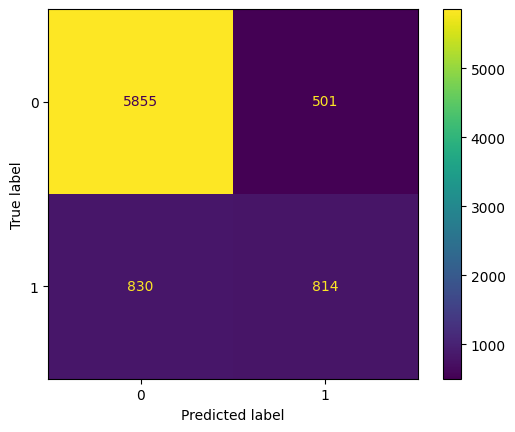

In [ ]:
# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(cm)

# classification report
report = classification_report(y_test, y_pred)
print(report)

# Testing Score
score = accuracy_score(y_pred, y_test)
print('Testing Accuracy:', score)

In [ ]:
round(df['Exited'].value_counts(normalize=True)*100, 2)

,proportion
Exited,
0,79.63
1,20.37
